<a href="https://colab.research.google.com/github/AHartNtkn/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/DS7_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def mean(numbers):
    return sum(numbers)/len(numbers)
  
def variance(numbers):
  return sum(list(map(lambda x: (x-mean(numbers))**2, numbers)))/(len(numbers)-1)

def standardDeviation(numbers):
  return variance(numbers)**(1/2)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

print('Mean: ', mean(sales),
      '\nVariance: ', variance(sales),
      '\nStandard Deviation: ', standardDeviation(sales))

Mean:  3052.714285714286 
Variance:  214387.90476190473 
Standard Deviation:  463.0204150595357


In [0]:
import numpy as np

In [0]:
np.std(sales, ddof=1)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import pandas as pd

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

res = pd.DataFrame({'Sales': sales, 'Customers': customers}).cov()

cov = np.cov(sales, customers, ddof=1)[0][1]

cov

7604.357142857142

The covariance is about 7604.

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
cust_std = standardDeviation(customers)
print("Customer Standard Deviation: ", cust_std)

correlation = cov / (cust_std * standardDeviation(sales))
print("Correlation: ", correlation)

Customer Standard Deviation:  17.057326313123664
Correlation:  0.9628339778148909


In [0]:
pd.DataFrame({'Sales': sales, 'Customers': customers}).corr()

,Sales,Customers
Sales,1.000000,0.962834
Customers,0.962834,1.000000


In [0]:
from scipy.stats.stats import pearsonr
print(pearsonr(sales,customers))

(0.9628339778148907, 0.0005013220403169455)


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

In [0]:
# Okay!

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

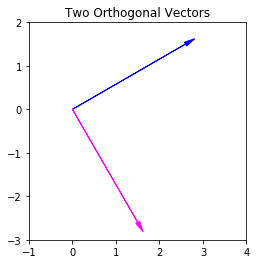

In [0]:
import matplotlib.pyplot as plt

m = np.array([[2.59808, 1.5], [1.5, -2.59808]])

fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')

plt.arrow(0,0, m[0,0], m[0,1], head_width=.1, head_length=.25, color = "b")
plt.arrow(0,0, m[1,0], m[1,1], head_width=.1, head_length=.25, color = "magenta")
plt.title('Two Orthogonal Vectors')

plt.xlim((-1,4))
plt.ylim((-3,2))

plt.show()

Perpendicular is a synonym for orthogonal.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])

np.dot(a,b)

-40

In [0]:
(a*b).sum()

-40

No, they are not orthogonal. If they were, they're dot product would be zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

print(np.linalg.norm(c)**2)
print(np.dot(c,c))
print(np.matmul(np.array([c]), np.array([c]).T))

665.0
665
[[665]]


They are all the same! (modulo some type coercion)

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{align}

\begin{align}
e = 2 \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])

unitf = f / np.linalg.norm(f)

unitf

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [0]:
np.linalg.norm(unitf)

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

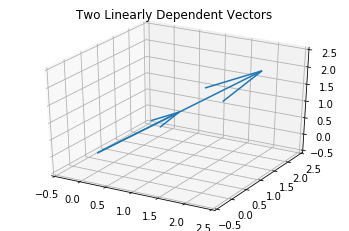

In [0]:
from mpl_toolkits.mplot3d import Axes3D

v = np.array([1,1,1])
v2 = np.array([2,2,2])

vects = [v, v2]
vects = np.array([ [0,0,0]+list(v) for v in vects ])

X, Y, Z, U, V, W = zip(*vects)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', title = 'Two Linearly Dependent Vectors')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-.5, 2.5])
ax.set_ylim([-.5, 2.5])
ax.set_zlim([-.5, 2.5])
plt.show()

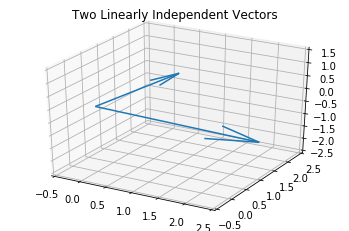

In [0]:
v = np.array([1,1,1])
v2 = np.array([2,2,-2])

vects = [v, v2]
vects = np.array([ [0,0,0]+list(v) for v in vects ])

X, Y, Z, U, V, W = zip(*vects)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', title = 'Two Linearly Independent Vectors')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-.5, 2.5])
ax.set_ylim([-.5, 2.5])
ax.set_zlim([-2.5, 1.5])
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
from scipy.linalg import lu

In [0]:
g = [1,2]
h = [4,8]
mat = [g,h]

_, u = lu(mat, permute_l=True)

u

array([[4., 8.],
       [0., 0.]])

$g$ and $h$ span $\mathbb{R}$, or, more exactly, $\{ (x, y) |  2 x = y \}$, a line.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]
mat = [l,m,n]

_, u = lu(mat, permute_l=True)

u

array([[4. , 8. , 2. ],
       [0. , 2. , 7.5],
       [0. , 0. , 2.5]])

$l$, $m$, and $n$ span $\mathbb{R}^3$.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



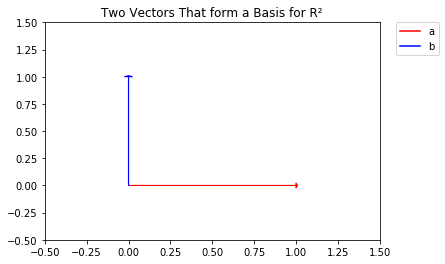

In [0]:
a = np.array([1,0])
b = np.array([0,1])

plt.axis([-.5, 1.5, -.5, 1.5])
plt.arrow(0, 0, a[0], a[1],  head_width=.05, head_length=0.01, color = 'r')
plt.arrow(0, 0, b[0], b[1],  head_width=.05, head_length=0.01, color = 'b')

plt.title('Two Vectors That form a Basis for R²')

# Legend
plt.plot([], color='r', label='a')
plt.plot([], color='b', label='b')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

## 6.2 What does it mean to form a basis?

Given a vector space $V$, a set of $n$ linearly independent vectors $(e_i)_{i\in \text{dim}(V)}$ is a basis of $V$ if and only if, for every vector $v \in V$, $v = \sum_{i=1}^{n} c_i e_i$ for some unique family of scalars $(c_i)_\in \text{dim}(V)$.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
p = [[1,2,3],
     [-1,0,7],
     [4,8,2]]

_, u = lu(p, permute_l=True)

u

array([[4. , 8. , 2. ],
       [0. , 2. , 7.5],
       [0. , 0. , 2.5]])

In [0]:
np.linalg.matrix_rank(p)

3

The rank of $P$ is 3.

## 7.2 What does the rank of a matrix tell us?

The dimention of the space spanned by the matrix's component vectors.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
def projection(v, w):
  return (np.dot(w, v)/np.dot(v, v)) * v

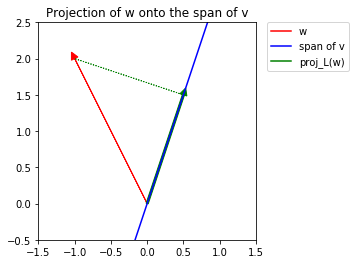

In [0]:
v = np.array([1,3])
w = np.array([-1,2])
projLw = projection(v, w)

t = np.arange(-2.0, 2.0, 0.01)
s = 3 * t

fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')

plt.axis([-1.5, 1.5, -0.5, 2.5])

plt.plot(t, s, c='b')


plt.arrow(0, 0, w[0], w[1],  head_width=.10, head_length=0.10, color = 'r')
plt.arrow(0, 0, projLw[0], projLw[1], width=.03, head_width=.10, head_length=0.10, color = 'g')
plt.arrow(w[0], w[1], projLw[0]-w[0], projLw[1]-w[1],  head_width=.05, head_length=0.01, color = 'g', ls=':')

plt.title('Projection of w onto the span of v')

# Legend
plt.plot([], color='r', label='w')
plt.plot([], color='b', label='span of v')
plt.plot([], color='g', label='proj_L(w)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

Note that the projection will be with respect to the vector $[1, 1]$. We can caluclate that $\frac{[x, y] \cdot [1, 1]}{[1, 1] \cdot [1, 1]}[1, 1] = [\frac{x+y}{2}, \frac{x+y}{2}]$. Since the new x and y coordinates will be the same, we can just calculate them once.

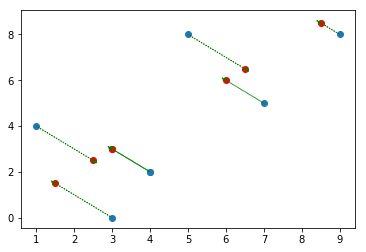

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df['new'] = (df.x + df.y)/2

for i in df.T:
  plt.arrow(df.x[i], df.y[i], df.new[i]-df.x[i],df.new[i]-df.y[i], head_width=.15, head_length=0.15, color = 'g', ls=':')

df.head()

plt.scatter(df.x, df.y)
plt.scatter(df.new, df.new, c='r')
plt.show()